In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.family']='sans-serif'
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import matplotlib.pyplot as plt

# 决策树

## 导入数据

In [2]:
data = pd.read_csv('./watermalon3/watermalon3.csv')
#data.iloc[:,-1] = data.iloc[:,-1].apply(lambda x : 1.0 if x == data.iloc[:,-1][0] else 0.0)
data

,色泽,根蒂,敲击,纹理,脐部,触感,密度,含糖率,label
0,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,好瓜
1,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,好瓜
2,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,好瓜
3,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,好瓜
4,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,好瓜
5,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,好瓜
6,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,好瓜
7,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,好瓜
8,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,坏瓜
9,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,坏瓜


In [3]:
data_train = pd.read_csv('./watermalon2/data2.0train.csv').iloc[:,1:]
data_test = pd.read_csv('./watermalon2/data2.0cv.csv').iloc[:,1:]

In [4]:
data_train

,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
4,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
5,青绿,硬挺,清脆,清晰,平坦,软粘,否
6,浅白,稍蜷,沉闷,稍糊,凹陷,硬滑,否
7,乌黑,稍蜷,浊响,清晰,稍凹,软粘,否
8,浅白,蜷缩,浊响,模糊,平坦,硬滑,否
9,青绿,蜷缩,沉闷,稍糊,稍凹,硬滑,否


In [5]:
data_test

,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
1,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
2,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
3,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
4,浅白,硬挺,清脆,模糊,平坦,硬滑,否
5,浅白,蜷缩,浊响,模糊,平坦,软粘,否
6,青绿,稍蜷,浊响,稍糊,凹陷,硬滑,否


## 连续值处理

### 二分法选择最佳划分点

In [6]:
# 计算信息熵
def Ent(dataSet):
    classes = dataSet.iloc[:,-1].value_counts()
    # 获取每个类的实例数
    num_k = classes.values
    # 获取类数
    k = len(classes)
    # 计算信息熵
    ent = 0
    for i in range(k):
        p_i = num_k[i]*1.0/len(dataSet.values)
        ent += p_i*np.log2(p_i)
    return -ent

In [7]:
def best_division(dataSet, attr):
    gain = []
    sort = np.sort(dataSet[attr])
    T = [(sort[i]+sort[i+1])*1.0/2 for i in range(len(dataSet)-1)]
    for t in T:
        s = 0
        s += len(dataSet[dataSet[attr]<=t])*1.0/len(dataSet)*Ent(dataSet[dataSet[attr]<=t])
        s += len(dataSet[dataSet[attr]>t])*1.0/len(dataSet)*Ent(dataSet[dataSet[attr]>t])
        gain.append(Ent(dataSet)-s)
    return np.max(np.array(gain)), T[np.argmax(np.array(gain))]

a,b = best_division(data, '密度')

## 划分方式

### 信息熵

In [8]:
def info_ent(dataSet, attrs):
    # 计算信息熵
    def Ent(dataSet):
        classes = dataSet.iloc[:,-1].value_counts()
        # 获取每个类的实例数
        num_k = classes.values
        # 获取类数
        k = len(classes)
        # 计算信息熵
        ent = 0
        for i in range(k):
            p_i = num_k[i]*1.0/len(dataSet.values)
            ent += p_i*np.log2(p_i)
        return -ent
    
    ents = []
    for a in attrs:
        values = dataSet[a].value_counts().index
        s = 0
        for v in values:
            s += Ent(dataSet[dataSet[a]==v])
        ents.append(s)
    ents = np.array(ents)
    
    return np.random.choice(attrs[ents==np.min(ents)])
    
info_ent(data_train, data_train.columns[:-1])

'色泽'

### 信息增益

In [9]:
def info_gain(dataSet, attrs):
    # 计算信息熵
    def Ent(dataSet):
        classes = dataSet.iloc[:,-1].value_counts()
        # 获取每个类的实例数
        num_k = classes.values
        # 获取类数
        k = len(classes)
        # 计算信息熵
        ent = 0
        for i in range(k):
            p_i = num_k[i]*1.0/len(dataSet.values)
            ent += p_i*np.log2(p_i)
        return -ent

    # 计算信息增益
    def Gain(dataSet, attr):
        values = dataSet[attr].value_counts().index
        s = 0
        for i in range(len(values)):
            tmp = dataSet[dataSet[attr]==values[i]]
            s += len(tmp)*1.0/len(dataSet)*Ent(tmp)
        return Ent(dataSet)-s
    
    # 找最大值
    gain = []
    for i in range(len(attrs)):
        gain.append(Gain(dataSet, attrs[i]))
    gain = np.array(gain)
    
    return np.random.choice(attrs[gain==np.max(gain)])



info_gain(data_train, data_train.columns[:-1])

'脐部'

### 增益率（识别并处理缺失值与连续值）

In [10]:
missing_sign = '?'

# 可以处理连续变量
def gain_ratio(dataSet, attrs):
    # 计算信息熵
    def Ent(dataSet):
        classes = dataSet.iloc[:,-1].value_counts()
        # 获取每个类的实例数
        num_k = classes.values
        # 获取类数
        k = len(classes)
        # 计算信息熵
        ent = 0
        for i in range(k):
            p_i = num_k[i]*1.0/len(dataSet.values)
            ent += p_i*np.log2(p_i)
        return -ent

    # 计算信息增益和IV值
    def Gain_IV(dataSet, attr):
        values = dataSet[attr].value_counts().index
        s = 0
        iv = 0
        for i in range(len(values)):
            dataSet[dataSet[attr]==values[i]]
            tmp = len(dataSet[dataSet[attr]==values[i]])*1.0/len(dataSet)
            s += tmp*Ent(dataSet[dataSet[attr]==values[i]])
            iv -= tmp*np.log2(tmp)
        return (Ent(dataSet)-s), iv
    
    def is_consequent(dataSet, attr):
        if (isinstance(dataSet[attr].iloc[0], float) 
        or isinstance(dataSet[attr].iloc[0], int) 
        and abs(len(dataSet)-len(dataSet[attr].value_counts()))<=2):
            return True
        else:
            return False
    
    def best_division(dataSet, attr):
        gain = []
        sort = np.sort(dataSet[attr])
        T = [(sort[i]+sort[i+1])*1.0/2 for i in range(len(dataSet)-1)]
        for t in T:
            s = 0
            iv = 0
            s += len(dataSet[dataSet[attr]<=t])*1.0/len(dataSet)*Ent(dataSet[dataSet[attr]<=t])
            iv -= len(dataSet[dataSet[attr]<=t])*1.0/len(dataSet)*np.log2(len(dataSet[dataSet[attr]<=t])*1.0/len(dataSet))
            s += len(dataSet[dataSet[attr]>t])*1.0/len(dataSet)*Ent(dataSet[dataSet[attr]>t])
            iv -= len(dataSet[dataSet[attr]>t])*1.0/len(dataSet)*np.log2(len(dataSet[dataSet[attr]>t])*1.0/len(dataSet))
            gain.append(Ent(dataSet)-s)
        return np.max(np.array(gain)), iv, T[np.argmax(np.array(gain))]
    
    # 启发式搜索最大值
    consequent_attrs = {}
    gain = []
    gain_r = []
    for i in range(len(attrs)):
        if is_consequent(dataSet, attrs[i]):
            gain_, iv, t = best_division(dataSet, attrs[i])
            consequent_attrs[attrs[i]] = t
        else:
            gain_, iv = Gain_IV(dataSet, attrs[i])
        gain.append(gain_)
        gain_r.append(gain_/iv)
    gain = pd.Series(gain)
    gain_avg = gain[gain>np.average(gain)]
    ind = (gain_avg==np.max(gain_avg))[(gain_avg==np.max(gain_avg))==True].index
    best_attr = np.random.choice(np.array(attrs)[ind])
    if best_attr in consequent_attrs.keys():
        return best_attr, consequent_attrs[best_attr]
    else: 
        return best_attr, 0

gain_ratio(data, data.columns[:-1])

('纹理', 0)

### 基尼指数

In [11]:
def gini_index(dataSet, attrs):
    # 计算数据集的基尼指数
    def Gini(dataSet):
        classes = dataSet.iloc[:,-1].value_counts()
        # 获取每个类的实例数
        num_k = classes.values
        # 获取类数
        k = len(classes)
        gini = 0
        for i in range(k):
            gini += (num_k[i]/len(dataSet))**2
        return 1 - gini

    # 计算数据集属性的基尼指数
    def Gini_index(dataSet, attr):
        values = dataSet[attr].value_counts().index
        s = 0
        for i in range(len(values)):
            dataSet[dataSet[attr]==values[i]]
            tmp = len(dataSet[dataSet[attr]==values[i]])
            s += tmp*1.0/len(dataSet)*Gini(dataSet[dataSet[attr]==values[i]])
        return s
    
    gini = []
    for i in range(len(attrs)):
        gini.append(Gini_index(dataSet, attrs[i]))
    gini = pd.Series(gini)
    
    return np.random.choice(attrs[gini==np.min(gini)])
    
gini_index(data_train, data_train.columns[:-1])

'色泽'

## 生成决策树

In [12]:
def GenerateDecisionTree(dataSet, attrs, method='c4.5'):
    attrs = np.array(attrs)
    
    # 获取类
    classes = dataSet.iloc[:,-1].value_counts().index
    
    # 类别数
    k = len(dataSet.iloc[:,-1].value_counts())
    
    # 若数据集中只有一类样本，不划分，则返回其类
    if k==1:
        return classes[0]
    
    # 若当前属性集为空或所有样本在所有属性上的取值相同，不划分，返回样本数最多的类
    if len(attrs)==0 or len(data.iloc[:,:-1].drop_duplicates())==1:
        return dataSet.iloc[:,-1].value_counts().idxmax()

    # 从属性集中选取最优属性
    if method=='id3':
        best_attr = info_gain(dataSet, attrs)
    elif method=='c4.5':
        best_attr, t = gain_ratio(dataSet, attrs)
    elif method=='cart':
        best_attr = gini_index(dataSet, attrs)
    else:
        print('method参数错误，备选方案：【id3, c4,5, cart】')
        return
    
    # 初始化结点node
    node = {best_attr: {}}
    # 对于每个离散属性生成分支
    if t==0:
        for a in dataSet[best_attr].value_counts().index:
            d_v = dataSet[dataSet[best_attr]==a]
            if len(d_v)==0:
                node[best_attr][a] = dataSet.iloc[:,-1].value_counts().idxmax()
                return node
            else:
                ind = np.argwhere(attrs==best_attr)
                new_attrs = np.delete(attrs, ind)
                node[best_attr][a] = GenerateDecisionTree(d_v, new_attrs, method=method)
                #print(node)
    else:
        tmp = dataSet[best_attr].apply(lambda x:"是" if x<=t else "否")
        for a in tmp.value_counts().index:

            d_v = dataSet[tmp==a]

            tmp_attr = best_attr+"<=%.3f"%t
            if len(d_v)==0:
                node[tmp_attr][a] = dataSet.iloc[:,-1].value_counts().idxmax()
                return node
            else:
                ind = np.argwhere(attrs==best_attr)
                new_attrs = np.delete(attrs, ind)
                if tmp_attr not in node.keys():
                    node[tmp_attr] = node.pop(best_attr)
                node[tmp_attr][a] = GenerateDecisionTree(d_v, new_attrs, method=method)
                #print(node)
        
    return node

## 可视化决策树

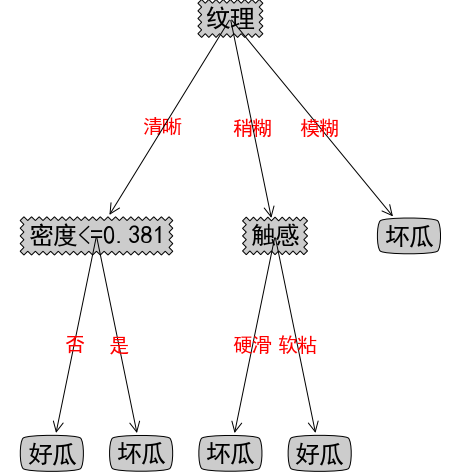

In [13]:
# 获取树的叶子节点数目
def get_num_leafs(decision_tree):
    num_leafs = 0
    first_str = next(iter(decision_tree))
    second_dict = decision_tree[first_str]
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            num_leafs += get_num_leafs(second_dict[k])
        else:
            num_leafs += 1
    return num_leafs
 
# 获取树的深度
def get_tree_depth(decision_tree):
    max_depth = 0
    first_str = next(iter(decision_tree))
    second_dict = decision_tree[first_str]
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            this_depth = 1 + get_tree_depth(second_dict[k])
        else:
            this_depth = 1
        if this_depth > max_depth:
            max_depth = this_depth
    return max_depth
 
# 绘制节点
def plot_node(node_txt, center_pt, parent_pt, node_type):
    arrow_args = dict(arrowstyle='<-')
    create_plot.ax1.annotate(node_txt, xy=parent_pt,  xycoords='axes fraction', xytext=center_pt, 
                             textcoords='axes fraction', va="center", ha="center", 
                             bbox=node_type,arrowprops=arrow_args, fontsize=25)

# 标注划分属性
def plot_mid_text(cntr_pt, parent_pt, txt_str):
    x_mid = (parent_pt[0] - cntr_pt[0]) / 2.0 + cntr_pt[0]
    y_mid = (parent_pt[1] - cntr_pt[1]) / 2.0 + cntr_pt[1]
    create_plot.ax1.text(x_mid, y_mid, txt_str, va="center", ha="center", color='red',fontsize=20)
    return



# 绘制树
def plot_tree(decision_tree, parent_pt, node_txt):
    d_node = dict(boxstyle="sawtooth", fc="0.8")
    leaf_node = dict(boxstyle="round4", fc='0.8')
    num_leafs = get_num_leafs(decision_tree)
    first_str = next(iter(decision_tree))
    cntr_pt = (plot_tree.xoff + (1.0 +float(num_leafs))/2.0/plot_tree.totalW, plot_tree.yoff)
    plot_mid_text(cntr_pt, parent_pt, node_txt)
    plot_node(first_str, cntr_pt, parent_pt, d_node)
    second_dict = decision_tree[first_str]
    plot_tree.yoff = plot_tree.yoff - 1.0/plot_tree.totalD
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            plot_tree(second_dict[k], cntr_pt, k)
        else:
            plot_tree.xoff = plot_tree.xoff + 1.0/plot_tree.totalW
            plot_node(second_dict[k], (plot_tree.xoff, plot_tree.yoff), cntr_pt, leaf_node)
            plot_mid_text((plot_tree.xoff, plot_tree.yoff), cntr_pt, k)
    plot_tree.yoff = plot_tree.yoff + 1.0/plot_tree.totalD
    return

def create_plot(dtree):
    fig = plt.figure(figsize=(8,8), facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    
    create_plot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plot_tree.totalW = float(get_num_leafs(dtree))
    plot_tree.totalD = float(get_tree_depth(dtree))
    plot_tree.xoff = -0.5/plot_tree.totalW
    plot_tree.yoff = 1.0
    plot_tree(dtree, (0.5, 1.0), '')
    plt.show()
    return

tree = GenerateDecisionTree(data, data.columns[:-1], method='c4.5')
create_plot(tree)

## 测试

In [14]:
tree = GenerateDecisionTree(data_train, data_train.columns[:-1], method='c4.5')
tree

{'色泽': {'乌黑': {'脐部': {'稍凹': {'纹理': {'稍糊': '是', '清晰': '否'}}, '凹陷': '是'}},
  '青绿': {'敲声': {'浊响': '是', '沉闷': '否', '清脆': '否'}},
  '浅白': '否'}}

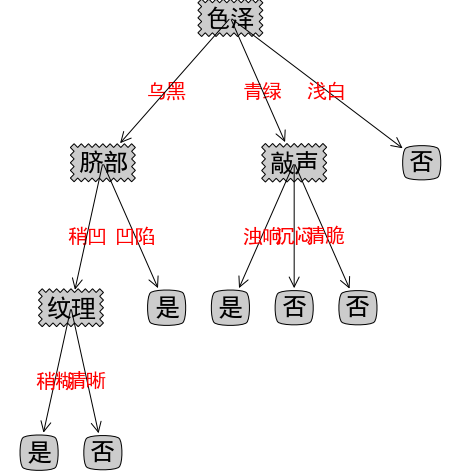

In [15]:
create_plot(tree)

In [16]:
# 测试函数
def test(tree, dataSet):
    # 输入一个不包含标签的样本，返回预测值
    def test_x(tree, x):
        head = list(tree.keys())[0]
        while True:
            if isinstance(tree[head], dict):
                tmp = tree[head]
                tree = tmp[x[head]]
                if isinstance(tree, dict):
                    head = list(tree.keys())[0]
                else:
                    break
            else:
                break
        return tree
    
    return np.array([test_x(tree, dataSet.iloc[i][:-1]) for i in range(len(dataSet))])

def get_acc(y_pre, y_true):
    from collections import Counter
    return Counter(y_pre==y_true)[True]/len(y_pre)

print("准确率：", get_acc(test(tree, data_test), data_test.iloc[:,-1]))

准确率： 0.2857142857142857


## 剪枝处理

In [17]:
tree = GenerateDecisionTree(data_train, data_train.columns[:-1], method='c4.5')
tree

{'脐部': {'稍凹': {'触感': {'软粘': {'纹理': {'清晰': {'色泽': {'乌黑': '否', '青绿': '是'}},
      '稍糊': '是'}},
    '硬滑': '否'}},
  '凹陷': {'色泽': {'乌黑': '是', '青绿': '是', '浅白': '否'}},
  '平坦': '否'}}

### 预剪枝

### 后剪枝

In [18]:
class Node(object):
    """节点类"""
    def __init__(self, elem, lchild=None,mchild=None, rchild=None):
        self.elem = elem
        self.lchild = lchild
        self.rchild = rchild
        self.mchild = mchild


class Tree(object):
    """树类"""
    def __init__(self, root=None):
        self.root = root



def createDecisionTree(dataSet, attrs, method='c4.5'):
            
    # 生成结点node
    node = Node("",None, None)
    
    # 获取类
    classes = dataSet.iloc[:,-1].value_counts().index
    
    # 类别数
    k = len(dataSet.iloc[:,-1].value_counts())
    
    # 若数据集中只有一类样本，不划分，则返回其类
    if k==1:
        node.elem = "label:%s"%classes[0]
        node.rchild = None
        node.lchild = None
        return node
    
    # 若当前属性集为空或所有样本在所有属性上的取值相同，不划分，返回样本数最多的类
    if len(attrs)==0 or len(data.iloc[:,:-1].drop_duplicates())==1:
        node.elem = "label:%s"%(dataSet.iloc[:,-1].value_counts().idxmax())
        node.rchild = None
        node.lchild = None
        return 
        
    
    # 从属性集中选取最优属性
    if method=='id3':
        best_attr = info_gain(dataSet, attrs)
    elif method=='c4.5':
        best_attr, t = gain_ratio(dataSet, attrs)
    elif method=='cart':
        best_attr = gini_index(dataSet, attrs)
    else:
        print('method参数错误，备选方案：【id3, c4,5, cart】')
        return

    
    # 对于每个属性生成分支
    for a in dataSet[best_attr].value_counts().index:
        d_v = dataSet[dataSet[best_attr]==a]
        node_v = Node("",None,None)
        node_a = Node("value:%s"%a)
        node.elem = "feature:%s"%best_attr
        if len(d_v)==0:
            
            node_v.elem = "label:%s"%dataSet.iloc[:,-1].value_counts().idxmax()
            if node.lchild==None:
                node_a.mchild = node_v
                node.lchild = node_a
            else:
                node_a.mchild = node_v
                node.rchild = node_v
            return node
        else:
            new_attrs = attrs.drop(best_attr)
            if node.lchild==None:
                node_a.lchild = createDecisionTree(d_v, new_attrs, method=method)
                node.lchild = node_a
            elif node.mchild == None:
                node_a.mchild = createDecisionTree(d_v, new_attrs, method=method)
                node.mchild = node_a
            else:
                node_a.rchild = createDecisionTree(d_v, new_attrs, method=method)
                node.rchild = node_a
            #print(node)
        
    return node

In [19]:
T = Tree()
T.root = createDecisionTree(data_train, data_train.columns[:-1],'id3')

In [20]:
# 前序遍历
def preOrder(node, branch):
    if node!=None:
        print("{",branch,node.elem,"} ",end='')
        preOrder(node.lchild, branch="l")
        preOrder(node.mchild, branch="m")
        preOrder(node.rchild, branch="r")
    
    return

# 中序遍历
def inOrder(node, branch):
    print(1)
    if node != None:
        inOrder(node.lchild, branch="l")
        #print("{",branch,node.elem,"} ",end='')
        inOrder(node.mchild, branch="m")
        inOrder(node.rchild, branch="r")
    
    return

def findDepth(node):
    if node == None:
        return 0
    else:
        leftD = findDepth(node.lchild)
        midD = findDepth(node.mchild)
        rightD = findDepth(node.rchild)
    
    return max([leftD, midD, rightD]) + 1



preOrder(T.root, 'root')

{ root feature:色泽 } { l value:乌黑 } { l feature:脐部 } { l value:稍凹 } { l feature:纹理 } { l value:稍糊 } { l label:是 } { m value:清晰 } { m label:否 } { m value:凹陷 } { m label:是 } { m value:青绿 } { m feature:敲声 } { l value:浊响 } { l label:是 } { m value:沉闷 } { m label:否 } { r value:清脆 } { r label:否 } { r value:浅白 } { r label:否 } 